# Проект: Сервис аренды самокатов GoFast

<a id="num1"></a>
## Цели

1. Изучить данные. 
2. Привести их в пригодный для анализа формат.
3. Проверить предлагаемые гипотезы. 
4. Сделать вывод на основе полученных результатов. 

<a id="num2"></a>
## Вопросы

1. Тратят ли пользователи с подпиской больше времени на поездки?
2. Верно ли, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? 
4. Подбор методов проверки гипотез для задач по определенным условиям. 

<a id="num3"></a>
## Оглавление 
* [1. Цели исследования](#num1)
* [2. Поставленные вопросы](#num2)
* [3. Оглавление](#num3)
* [4. Ключ к данным](#num4)
* [5. Подготовка данных](#num5)
    * [5.1. Библиотеки](#num51)
    * [5.2. Загрузка данных](#num52)
    * [5.3. Функции](#num53)
    * [5.4. Ознакомление с данными](#num54)
    * [5.5. Предобработка данных](#num55)
    * [5.5. Выводы](#num56)
* [6. Исследовательский анализ данных](#num6)
    * [6.1. Распределение пользователей по городам](#num61)
    * [6.2. Соотношение пользователей с подпиской ``free`` и ``ultra``](#num62)
    * [6.3. Распределение возраста пользователей](#num63)
    * [6.4. Распределение поездок по расстоянию](#num64)
    * [6.5. Распределение поездок по продолжительности](#num65)
    * [6.6. Вывод](#num66)
* [7. Объединение данных](#num7)  
    * [7.1. Объединение данных о пользователях, поездках и подписках](#num71) 
    * [7.2. Таблицы пользователей с подпиской и пользователей без подписки](#num72) 
    * [7.3. Расстояние и время поездок для пользователей обеих категорий](#num73)
    * [7.4. Вывод](#num74)
* [8. Подсчёт выручки](#num8)  
    * [8.1. Агрегированные данные о поездках](#num81)  
    * [8.2. Помесячная выручка для каждого пользователя](#num82)  
* [9. Проверка гипотез](#num9)  
    * [9.1. Гипотеза 1: тратят ли пользователи с подпиской больше времени на поездки?](#num91) 
    * [9.2. Гипотеза 2: среднее расстояние поездки пользователей с подпиской не превышает 3130 метров](#num92) 
    * [9.3. Гипотеза 3: помесячная выручка от пользователей с подпиской по месяцам выше.](#num93) 
    * [9.4. Гипотеза 4 (теоретическая).](#num94) 
    * [9.5. Вывод](#num95)
* [10. Распределения](#num10)   
* [11. Выводы](#num11)   

<a id="num4"></a>
## Ключ к данным

<a id="num5"></a>
## Подготовка данных

<a id="num51"></a>
### Библиотеки

Подключим следующие библиотеки.

In [1]:
import plotly.io as pio
pio.renderers.default = "png"
svg_renderer = pio.renderers["png"]
svg_renderer.scale = 1.2

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.graph_objects as go

<a id="num52"></a>
### Загрузка данных

Получим данные о пользователях ``users_go.csv``, о поездках ``rides_go.csv``, о подписке ``subscriptions_go.csv``.

In [3]:
users = pd.read_csv("C:\\Users\\alena\\OneDrive\\Рабочий стол\\Python\\Датасеты проектов Яндекс\\Статистический анализ данных\\users_go.csv")
print('Таблица users_go: \n\n', users.head(), '\n')
rides = pd.read_csv("C:\\Users\\alena\\OneDrive\\Рабочий стол\\Python\\Датасеты проектов Яндекс\\Статистический анализ данных\\rides_go.csv")
print('Таблица rides_go: \n\n', rides.head(), '\n')
subscriptions = pd.read_csv("C:\\Users\\alena\\OneDrive\\Рабочий стол\\Python\\Датасеты проектов Яндекс\\Статистический анализ данных\\subscriptions_go.csv")
print('Таблица subscriptions_go: \n\n', subscriptions, '\n')

Таблица users_go: 

    user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra 

Таблица rides_go: 

    user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28 

Таблица subscriptions_go: 

   subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199 



<a id="num53"></a>
### Функции

Добавим функции, которые пригодятся в дальнейшей работе. 

ункция ``data_head_desc_info`` отображает основную информацию о имеющихся данных из указанного файла. *data_head_desc_info(датафрейм)*.

In [4]:
def data_head_desc_info(data):
    try:
        display('Первые пять строк данных:')
        display(data.head(5))
        display('Описание данных:')
        display(data.describe())
        display('Общая информацию о датафрейме')
        display(data.info())
        display('Количество пропусков')
        display(data.isna().sum())
        display('Графическое отображение количества пропусков')
        display(pd.DataFrame(round(data.isna().mean()*100,1).sort_values()).style.background_gradient('Blues'))
    except:
        return 'Проверьте параметры'

Функция ``data_isna_nuniq`` для получения короткой информации по определенным столбцам.  
*data_isna_nuniq (столбец по которому получаем информацию по пропускам и уникальным значениям)*.

In [5]:
def data_isna_nuniq(data):
    try:
        for column in data.columns:
            print('Столбец:', column)
            print('Количество пропусков:', data[column].isna().sum())
            print('Количество уникальных значений:', data[column].nunique())
    except Exception as e:
        return 'Проверьте параметры: {}'.format(str(e))

Функция empty_s для получения короткой информации по пропускам в таблице.
empty_s (датафрейм).

In [6]:
def empty_s(data):
    formatted_data = (data.isna().mean() * 100).sort_values().to_frame().style.format("{:.2f}", na_rep="").background_gradient('Blues')
    display(formatted_data)

Палитра ``colors``: зададим предпочтительные для оформления цвета.

In [7]:
colors = (['#063751','#08527A',
           '#0B6DA2','#0E89CB',
           '#15A3EF','#3EB3F2',
           '#66C3F4','#8FD3F7',
           '#B7E3FA','#B7E3FA',
           '#8FD3F7','#66C3F4',
           '#3EB3F2','#15A3EF',
           '#0E89CB','#0B6DA2',
           '#08527A','#063751'])

Функция ``density_c`` для получения графика для определенных таблиц.  
*density_c (таблица)*.

In [8]:
def density_c(data):
    data_distance = data.rename(columns={'distance': 'Метры', 'duration': 'Минуты'})

    fig = px.density_contour(data_distance, 
                             x='Метры', 
                             y='Минуты', 
                             title='График плотности расстояния и времени для пользователей',
                             labels={'Метры': 'Метры', 'Минуты': 'Минуты'})

    fig.update_layout(xaxis_title='Метры', yaxis_title='Минуты',
                      plot_bgcolor='AliceBlue',
                      margin={"r": 0, "t": 50, "l": 0, "b": 50})
    fig.update_traces(contours_coloring="fill", contours_showlabels = True)

    fig.show()
    return 

<a id="num54"></a>
### Ознакомление с данными

Ознакомимся с таблицей о пользователях ``users``. 

In [9]:
data_head_desc_info(users)

'Первые пять строк данных:'

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


'Описание данных:'

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


'Общая информацию о датафрейме'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

'Количество пропусков'

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

'Графическое отображение количества пропусков'

,0
user_id,0.000000
name,0.000000
age,0.000000
city,0.000000
subscription_type,0.000000


В таблице представленны данные пользователей, которые зарегистрированы в сервисе GoFast и пользовались услугами аренды самокатов. 

Записей о пользователях в таблице``1565``, они представляют из себя:
- идентификатор пользователя;
- имя пользователя;
- возраст пользователя;
- город в котором были поездки;
- тип подписки. 

При первичном ознакомлении с данными в таблице ``users`` не выявлено проблем. Типы данных у столбцов верные, пропусков в данных нет.

Ознакомимся с таблицей о поездках ``rides``. 

In [10]:
data_head_desc_info(rides)

'Первые пять строк данных:'

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


'Описание данных:'

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


'Общая информацию о датафрейме'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

'Количество пропусков'

user_id     0
distance    0
duration    0
date        0
dtype: int64

'Графическое отображение количества пропусков'

,0
user_id,0.000000
distance,0.000000
duration,0.000000
date,0.000000


В таблице представленны данные о поездках, которые были совершены за наблюдаемый период c ``2021-01-01`` и по ``2021-12-01``. 

Записей о поездках в таблице``18068``, они представляют из себя:
- идентификатор пользователя;
- дистанцию конкретной поездки;
- продолжительность конкретной поездки;
- дату поездки.

При первичном ознакомлении с данными в таблице ``rides`` не выявлено проблем критических проблем и нет пропусков. 
Из того, что стоит исправить — тип данных для столбца ``date``. 

Ознакомимся с таблицей о подписках ``subscriptions``.

In [11]:
data_head_desc_info(subscriptions)

'Первые пять строк данных:'

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


'Описание данных:'

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


'Общая информацию о датафрейме'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

'Количество пропусков'

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

'Графическое отображение количества пропусков'

,0
subscription_type,0.000000
minute_price,0.000000
start_ride_price,0.000000
subscription_fee,0.000000


В таблице представленны данные о подписках, которые доступны пользователям. 

Записей о подписках в таблице``2``, они представляют из себя:
- тип подписки;
- цену за минуту;
- стоимость начала поездки;
- ежемесячная плата.

При первичном ознакомлении с данными в таблице ``subscriptions`` не выявлено проблем, типы данных верные, пропусков нет. 

Промежуточный вывод

Исходные данные описывают информацию о пользователях и их поездках в сервисе ``GoFast``, а также данные о доступных подписках.

Что можно сказать о данных: 
1. В таблице пользователей ``1565`` записей представлены данные о пользователях, включая их идентификаторы, имена, возраст, города и типы подписок. Нет проблем с типами данных или пропущенными значениями.

2. В таблице поездок ``18068`` записей содержатся данные о поездках, включая идентификаторы пользователей, дистанцию, продолжительность и дату каждой поездки. Отмечено, что стоит исправить тип данных для столбца ``date``.

3. В таблице подписок ``2`` записи представлена информация о доступных подписках, включая типы подписок, стоимость за минуту, начальную стоимость поездки и ежемесячную плату. Нет проблем с типами данных или пропущенными значениями.

Общее впечатление — данные в целом в порядке, однако, стоит обратить внимание на исправление типов данных в таблице с данными о поездках.

<a id="num55"></a>
### Предобработка данных

Добавим столбец с данными о месяцах совершения поездки.

In [12]:
rides['date'].astype('datetime64[M]').sort_values().unique()

array(['2021-01-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-05-01T00:00:00.000000000', '2021-06-01T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000', '2021-08-01T00:00:00.000000000',
       '2021-09-01T00:00:00.000000000', '2021-10-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [13]:
rides['date'].sort_values().min()

'2021-01-01'

In [14]:
rides['date'].sort_values().max()

'2021-12-30'

В данных представлены за каждый месяц 2021 года, начиная с 1 января и заканчивая 30 декабря. 

In [15]:
rides['month'] = rides['date'].astype('datetime64[M]')

Расстояние и продолжительность поездок приведем к целым числам.

In [16]:
rides['distance'] = rides['distance'].round(0)

In [17]:
rides['duration'] = rides['duration'].round(0).astype('int')

In [18]:
round(34.3)

34

Проверим данные на уникальность.

In [19]:
data_isna_nuniq(users)

Столбец: user_id
Количество пропусков: 0
Количество уникальных значений: 1534
Столбец: name
Количество пропусков: 0
Количество уникальных значений: 194
Столбец: age
Количество пропусков: 0
Количество уникальных значений: 29
Столбец: city
Количество пропусков: 0
Количество уникальных значений: 8
Столбец: subscription_type
Количество пропусков: 0
Количество уникальных значений: 2


Всего в таблице представлено ``1534`` уникальных ``user_id``. 

Пользователи представлены ``194`` уникальными именами. 

Возраст пользователей распределен между ``29`` сегментами, от ``12`` до ``43`` лет. 

Уникальных городов, в которых совершались поездки — ``8``. 

Проверим данные на дубликаты, так как записей в таблице ``1565``, а уникальных значений ``user_id`` — ``1534``.

In [20]:
display(users[users
              .duplicated(subset=['user_id', 
                                  'name', 
                                  'age', 
                                  'city', 
                                  'subscription_type'], keep=False)].sort_values(by='user_id'))

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


Часть данных имеет идентичные строки. Они будут удалены. 

In [21]:
users.drop_duplicates(subset=['user_id', 
                              'name', 
                              'age', 
                              'city', 
                              'subscription_type'], keep='first', inplace=True)

In [22]:
display(users[users
              .duplicated(subset=['user_id', 
                                  'name', 
                                  'age', 
                                  'city', 
                                  'subscription_type'], keep=False)].sort_values(by='user_id'))

,user_id,name,age,city,subscription_type


Проверим данные на уникальность ``rides``.

In [23]:
data_isna_nuniq(rides)

Столбец: user_id
Количество пропусков: 0
Количество уникальных значений: 1534
Столбец: distance
Количество пропусков: 0
Количество уникальных значений: 4608
Столбец: duration
Количество пропусков: 0
Количество уникальных значений: 40
Столбец: date
Количество пропусков: 0
Количество уникальных значений: 364
Столбец: month
Количество пропусков: 0
Количество уникальных значений: 12


In [24]:
display(rides[rides
              .duplicated(subset=['user_id', 
                                  'distance', 
                                  'duration', 
                                  'date', 
                                  'month'], keep=False)].sort_values(by='user_id'))

,user_id,distance,duration,date,month


Всего в таблице представлено ``1534`` уникальных ``user_id``. 

Расстояние поездок представлено ``4068`` уникальными значениями от ``0`` и до ``7211`` метра. 

Продолжительность поездок представлена ``40`` сегментами, от ``0`` до ``41`` минуты. 

Даты поездок представлены ``364`` днями — одним календарным годом и ``12`` месяцами.

Дубликатов в данных нет.

In [25]:
data_isna_nuniq(subscriptions)

Столбец: subscription_type
Количество пропусков: 0
Количество уникальных значений: 2
Столбец: minute_price
Количество пропусков: 0
Количество уникальных значений: 2
Столбец: start_ride_price
Количество пропусков: 0
Количество уникальных значений: 2
Столбец: subscription_fee
Количество пропусков: 0
Количество уникальных значений: 2


In [26]:
display(subscriptions[subscriptions
                      .duplicated(subset=['subscription_type', 
                                          'minute_price', 
                                          'start_ride_price', 
                                          'subscription_fee'], keep=False)].sort_values(by='subscription_type'))

,subscription_type,minute_price,start_ride_price,subscription_fee


Всего в таблице представлено ``2`` уникальных ``subscription_type``. 

Цена за минуту поездки представлена ``2`` уникальными значениями ``8`` и ``6``. 

Цена за начало поездки представлена ``2`` уникальными значениями ``0`` и ``50``. 

Цена на подписку представлена ``2`` уникальными значениями ``0`` и ``199``. 

Дубликатов в данных нет. 

<a id="num56"></a>
### Выводы

Данные проверены, можно сделать следующие выводы. 
1. **Таблица пользователей ``users``:**
   - В таблице содержится информация о ``1565`` пользователях, включая их идентификаторы, имена, возраст, города и типы подписок.
   - Нет проблем с типами данных или пропущенными значениями.
   - Всего представлено ``1534`` уникальных ``user_id``.
   - Есть ``194`` уникальных имени пользователей.
   - Возраст пользователей распределен между ``29`` сегментами, от ``12 до 43 лет``.
   - Дубликаты из данных удалены. 


2. **Таблица поездок ``rides``:**
   - В таблице представлена информация о ``18068`` поездках, включая идентификаторы пользователей, дистанцию, продолжительность и дату каждой поездки.
   - Тип данных для столбца ``date`` исправлен на дату.
   - Расстояние поездок представлено ``4068`` уникальными значениями от ``0  до 7211 метра``.
   - Продолжительность поездок представлена ``40`` сегментами, от ``0 до 41 минуты``.
   - Даты поездок представлены за один календарный год.
   - Дубликатов в данных нет.



3. **Таблица подписок ``subscription``:**
   - В таблице содержится информация о доступных подписках, включая типы подписок, цену за минуту, начальную стоимость поездки и ежемесячную плату.
   - Нет проблем с типами данных или пропущенными значениями.

Данные подготовлены к дальнейшей работе. 

<a id="num6"></a>
## Исследовательский анализ данных

Ознакомимся с данными на примере нескольких представлений: 
1. Как распределяются пользователи по представленным в данных городам. 
2. Соотношение пользователей по типам платной и бесплатной подписок. 
3. Как представлен возраст пользователей в данных. 
4. Как распределяются поездки по расстоянию. 
5. Как распределяются поездки по продолжительности. 

<a id="num61"></a>
### Распределение пользователей по городам

В данных представлены только 8 городов в которых работал сервис GoFast: 
- Пятигорск;
- Екатеринбург;
- Ростов на Дону;
- Краснодар;
- Сочи;
- Омск;
- Тюмень;
- Москва. 

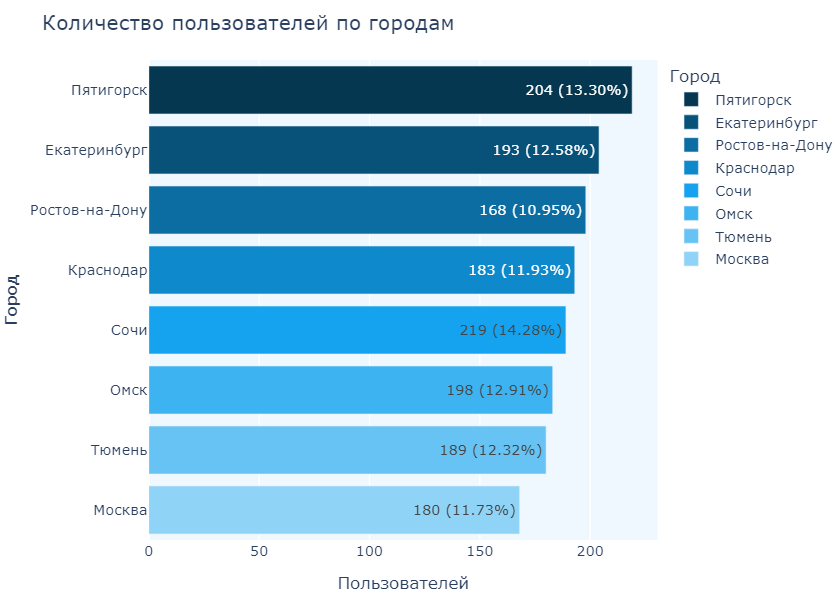

In [27]:
users_by_city = (users.groupby('city')['user_id'].count().reset_index()
                 .rename(columns={'city': 'Город', 'user_id': 'Пользователей'}))

total_users = users_by_city['Пользователей'].sum()
users_by_city['Процент'] = (users_by_city['Пользователей'] / total_users) * 100

fig = px.bar(users_by_city.sort_values(by='Пользователей', ascending=False),
             x='Пользователей', 
             y='Город',    
             color='Город',
             color_discrete_sequence=colors,
             text=['{} ({:.2f}%)'.format(val, pct) for val, pct in zip(users_by_city['Пользователей'], users_by_city['Процент'])],
             title='Количество пользователей по городам')

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(yaxis_title='Город',
                  xaxis_title='Пользователей',
                  showlegend=True, legend_title='Город',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show()


Больше всего пользователей из ``Пятигорска`` — ``219`` это ``13.3 %`` от всех, меньше всего из ``Москвы`` — ``168`` это 11.73% от всех пользователей. 

<a id="num62"></a>
### Соотношение пользователей с подписками ``free`` и ``ultra``

В данных представлено всего __два вида подписок__: 
- ``free`` — подписки нет, нет помесячного платежа, но цены за минуту поездки выше, а также есть плата за старт поездки;
- ``ultra`` — подписка есть, есть помесячный платеж, но цены за минуту ниже, а также нет платы за старт поездки. 

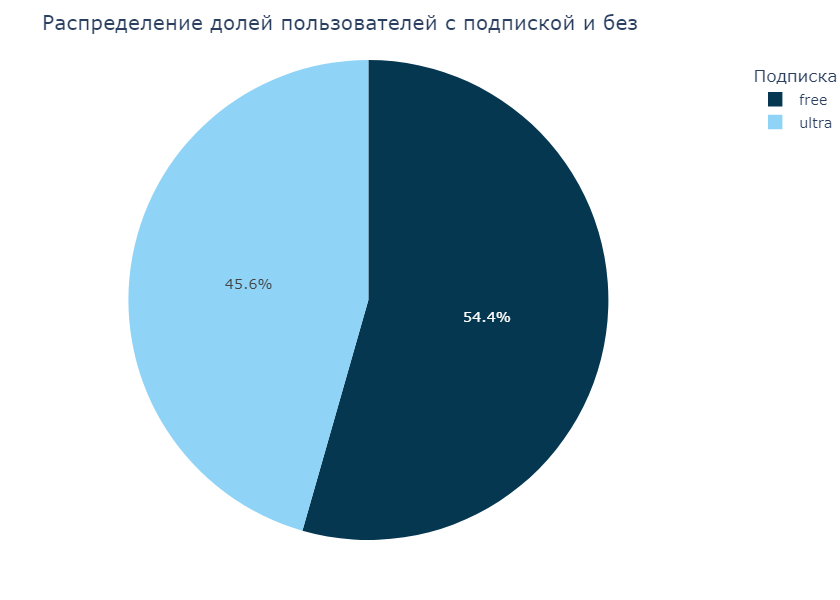

In [28]:
fig = px.pie((users
             .groupby('subscription_type')['user_id']
             .count()
             .reset_index()
             .rename(columns={
                 'subscription_type': 'Подписка', 
                 'user_id': 'Пользователей'}))
             .sort_values(by='Пользователей', ascending=False),
             
             values='Пользователей', 
             names='Подписка', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей пользователей с подпиской и без', 
             height=500)

fig.update_traces(textposition='inside', textinfo='percent', hovertemplate='')
fig.update_layout(showlegend=True, legend_title='Подписка',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})

fig.show()

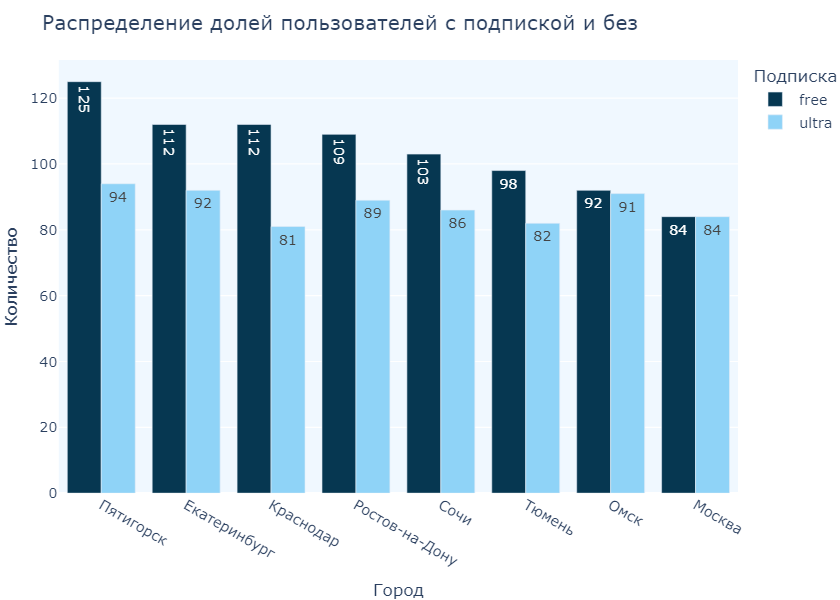

In [29]:
grouped = users.groupby(['city', 'subscription_type']).agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False).reset_index()

fig = px.bar(grouped
             .rename(columns={
                 'subscription_type': 'Подписка', 
                 'city': 'Город',
                 'user_id': 'Количество'}), 
             x='Город', 
             y='Количество', 
             color='Подписка', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей пользователей с подпиской и без',        
             barmode='group',
             text='Количество')

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(showlegend=True, legend_title='Подписка',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show()

Среди всех пользователей ``45.6%`` пользователей __покупают ежемесячную подписку__, ``54.4%`` — __не покупают подписку__. 

Практически во всех городах количество пользователей __без подписки выше__, чем пользователей с подпиской. В Москве это значение одинаково: а категориях с подпиской и без по ``84`` пользователя. 

<a id="num63"></a>
### Распределение возраста пользователей

Возраст пользователей представлен ``29`` уникальными значениями в диапазоне ``от 12 до 43 лет``. 

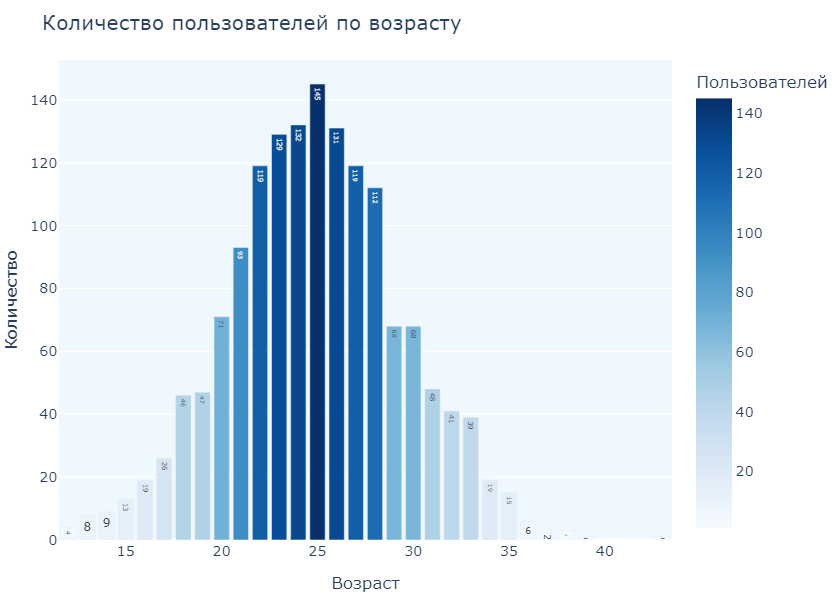

In [30]:
fig = px.bar((users
             .groupby('age')['user_id']
             .count()
             .reset_index()
             .rename(columns={
                 'age': 'Возраст', 
                 'user_id': 'Пользователей'}))
             .sort_values(by='Пользователей', ascending=False),
             x='Возраст', 
             y='Пользователей',    
             color='Пользователей',
             color_continuous_scale='blues',  
             text='Пользователей', 
             title='Количество пользователей по возрасту')
            
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(yaxis_title='Количество',
                  xaxis_title='Возраст',
                  showlegend=True, legend_title='Пользователей',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show() 

Пользователи равномерно распределяются по возрасту, пик и преобладающий возраст клиентов — ``25 лет``. 

<a id="num64"></a>
### Распределение поездок по расстоянию

Поездки пользователей довольно сильно распределены. Всего уникальных значений — ``4608``. Минимальное расстояние поездки ``1 метр``, а максимальное ``7211 метров`` — больше ``7 км`` за одну поездку. 

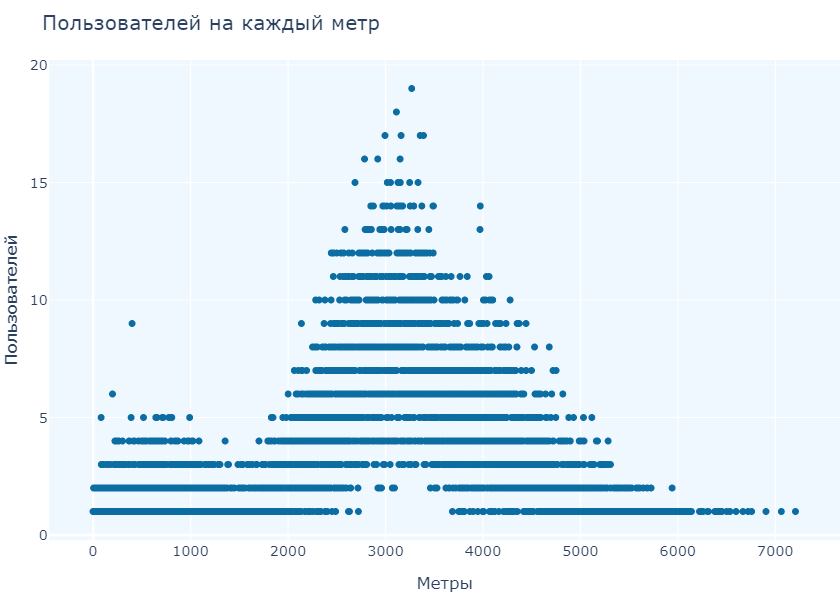

In [31]:
rides_distance = rides.groupby(rides['distance'])['user_id'].count().reset_index()
                               
rides_distance = rides_distance.rename(columns={'distance': 'Метры', 'user_id': 'Пользователей'})

fig = px.scatter(rides_distance, 
                 x='Метры', 
                 y='Пользователей', 
                 color_discrete_sequence=[colors[2]],
                 title='Пользователей на каждый метр')

fig.update_layout(xaxis_title='Метры', yaxis_title='Пользователей',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show()

На этом графике не получится сделать точных утверждений, но он дает более широкое представление о данных. Все значения примерны, для точных значений будут использованы другие методы. 

Поездки распределены с пиками в двух участках, __первый__ ``от 1 метра``, до, примерно, ``1500 метров``, таких поездок много, но не большинство. 

__Второй пик__ примерно от ``1500 метров и до 6000 метров``, пик находится в области ``3000 метров``. Все значения, которые встречаются дальше единичны. 

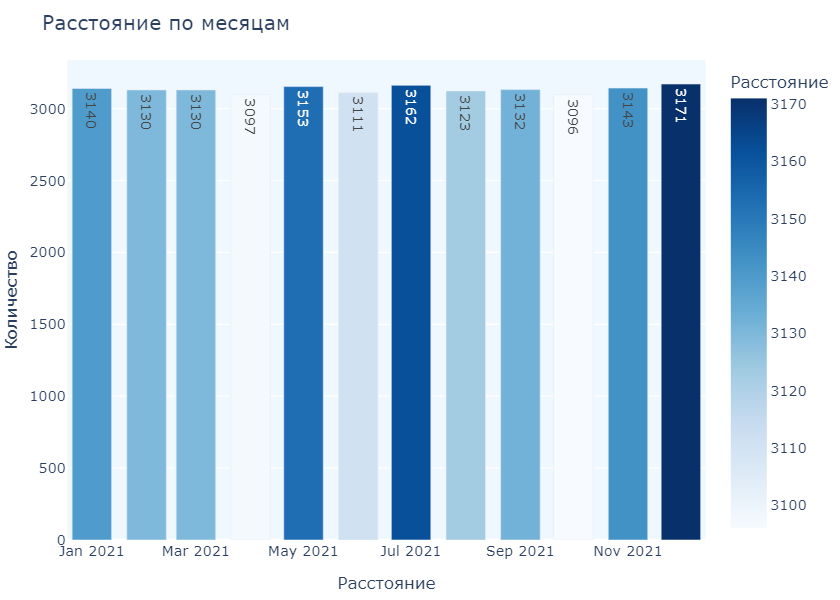

In [32]:
fig = px.bar((rides
             .groupby('month')['distance']
             .median().round()
             .reset_index()
             .rename(columns={
                 'month': 'Месяц', 
                 'distance': 'Расстояние'}))
             .sort_values(by='Месяц', ascending=False),
             x='Месяц', 
             y='Расстояние',    
             color='Расстояние',
             color_continuous_scale='blues',  
             text='Расстояние', 
             title='Расстояние по месяцам')
            
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(yaxis_title='Количество',
                  xaxis_title='Расстояние',
                  showlegend=True, legend_title='Расстояние',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show() 

На графике выше представлены поездки по месяцам и медианное расстояние для них. На протяжении года расстояние примерно одинаковое, так что сезонный фактор коротких/длинных поездок можно исключить. 

Причины разделения поездок по пикам могут быть разнообразными и для получения более точных результатов, стоит изучить данные более подробно, например, о маршрутах, местах старта и окончания поездки, погоде, времени суток. Сейчас могу предположить, что короткие поездки в больших городах совершают пользователи, которые хотят добраться до точки пересадки на следующий транспорт, либо для передвижения в жилых массивах, маршруты через которые не таких продолжительные. Длинные же, вероятно, совершаются когда пользователь пренебрегает пересадкой на другой транспорт и решает доехать на самокате. 

Посмотрим на распределение поездок более наглядно. 

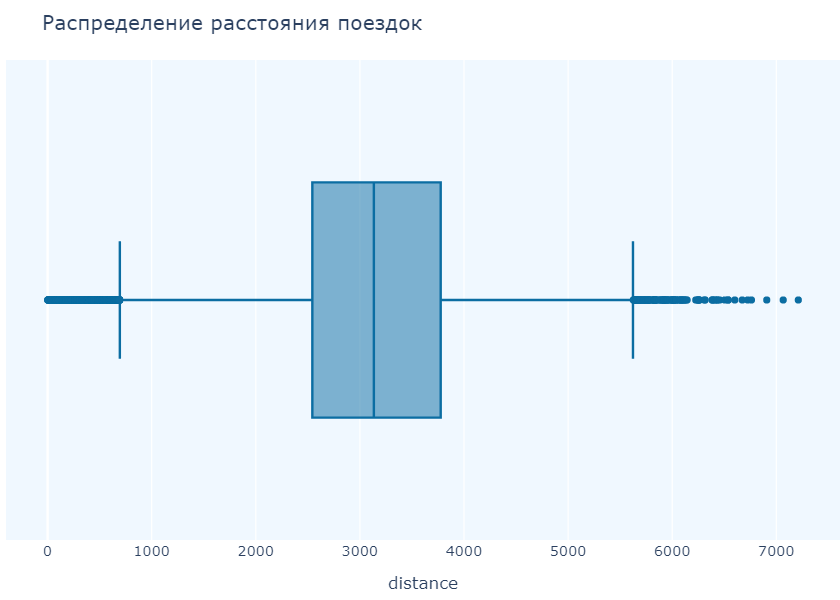

In [33]:
fig = px.box(rides, 
             x=rides['distance'], 
             color_discrete_sequence=[colors[2]],
             title='Распределение расстояния поездок')
fig.update_layout(plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show()

__Нижней границей__ допустимых значений для расстояния поездки можно считать — ``694 метра``. ``От 2543 метров до 3776`` расположена масса основных значений. __Верхняя граница__ допустимых значений ``5623 метра``. __Медианное значение__ всех поездок ``3134 метра``. 

Все поездки, которые находтся ``до 694 метров и после 5623 метров``, можно считать __непостоянными и разовыми__. 

<a id="num65"></a>
### Распределение поездок по продолжительности

Время поездок находится в границах ``от 0 минут и до 41``. Уникальных значений времени — ``40``. 

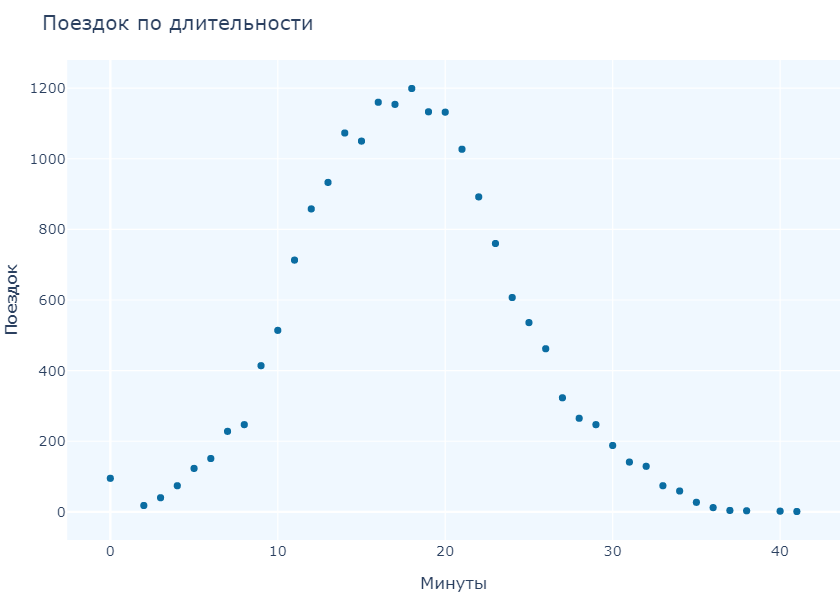

In [34]:
rides_duration = rides.groupby(rides['duration'])['user_id'].count().reset_index()
rides_duration = rides_duration.rename(columns={'duration': 'Минуты', 'user_id': 'Поездок'})

fig = px.scatter(rides_duration, 
                 x='Минуты', 
                 y='Поездок', 
                 color_discrete_sequence=[colors[2]],
                 title='Поездок по длительности')

fig.update_layout(xaxis_title='Минуты', yaxis_title='Поездок',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show()

Большая часть поездок совершается в рамках ``15-20 минут``.

Посмотрим на распределение поездок более детально. 

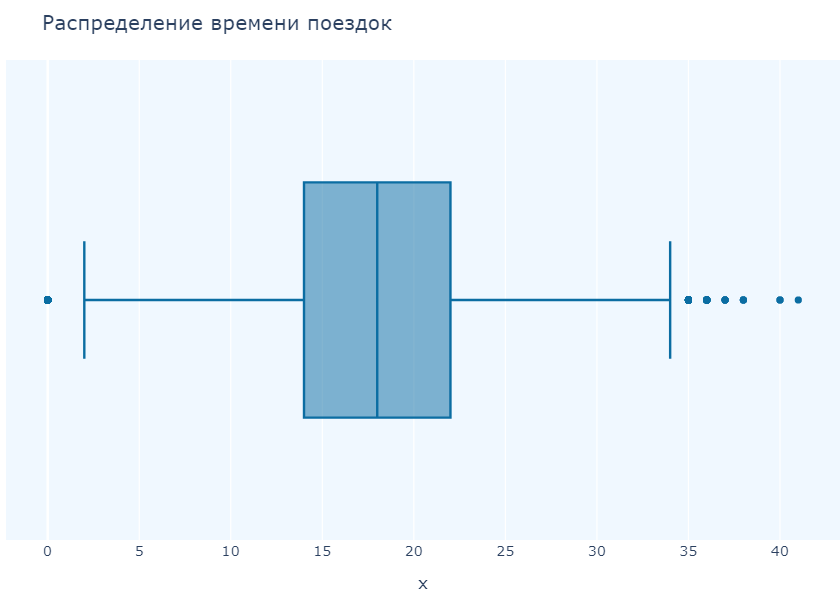

In [35]:
fig = px.box(rides, 
             x=rides['duration'].round(0), 
             color_discrete_sequence=[colors[2]],
             title='Распределение времени поездок')
fig.update_layout(plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show()

__Нормальное время__ поездок можно считать ``от двух минут``, все что меньше — случайные или отмененные поездки, либо ошибка в данных. __Максимальное нормальное__ время поездки ``до 34 минут``. 

``От 14 до 22 минут`` расположена масса основных значений поездок, __медианное__ же время поездок ``18 минут``. 

<a id="num66"></a>
### Вывод

Что можно сказать по итогам исследования данных: 
1. **Города и пользователи:** 
    - В данных представлены информация о ``8`` городах, в которых работал сервис ``GoFast``.
    - Пятигорск имеет наибольшее количество пользователей ``219``, в то время как Москва представлена наименьшим количеством пользователей ``168``.

2. **Подписки:**
    - Существуют два вида подписок: ``free`` (без помесячной платы, но с более высокими ценами за минуту и старт поездки) и ``ultra`` (с помесячной платой, но с более низкими ценами за минуту и отсутствием стартовой платы).
    - ``45.6%`` пользователей выбирают ``ultra``, в то время как ``54.4%`` не используют подписку.

3. **Возраст пользователей:**
    - Возраст пользователей разнообразен и представлен ``29`` уникальными значениями в диапазоне ``от 12 до 43 лет``.
    - Средний возраст клиентов — ``25 лет``.

4. **Поездки:**
    - Расстояние поездок имеет ``4608`` уникальных значений, варьирующихся ``от 1 метра до 7211 метров`` (более 7 км).
    - График распределения поездок показывает два пика: один ``от 1 метра до 1500 метров`` и второй ``от 1500 метров до 6000 метров``.
    - Медианное расстояние всех поездок составляет ``3134 метра``.
    - Поездки менее ``694 метров и более 5623 метров`` можно считать непостоянными или случайными.

5. **Время поездок:**
    - Время поездок охватывает ``40`` уникальных значений в пределах ``от 0 до 41 минуты``.
    - Нормальное время поездок считается ``от 2 минут``, с максимальным нормальным временем ``до 34 минут``.
    - Основные значения по времени поездок находятся в диапазоне ``от 14 до 22 минут``, с медианным значением ``18 минут``.

<a id="num7"></a>
## Объединение данных

<a id="num71"></a>
### Объединение данных  о пользователях, поездках и подписках

Объединим данные для дальнейшей работы. 

In [36]:
users.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


In [37]:
rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659010,17.803852
std,434.734317,1116.832209,6.104153
min,1.000000,1.000000,0.000000
25%,487.000000,2543.000000,14.000000
50%,889.000000,3134.000000,18.000000
75%,1213.250000,3776.000000,22.000000
max,1534.000000,7211.000000,41.000000


In [38]:
subscriptions.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


In [39]:
data = (users.merge(rides, on='user_id').merge(subscriptions, on='subscription_type'))

In [40]:
data.describe()

,user_id,age,distance,duration,minute_price,start_ride_price,subscription_fee
count,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,24.893071,3070.659010,17.803852,7.280496,32.012398,71.590658
std,434.734317,4.582216,1116.832209,6.104153,0.959882,23.997045,95.508238
min,1.000000,12.000000,1.000000,0.000000,6.000000,0.000000,0.000000
25%,487.000000,22.000000,2543.000000,14.000000,6.000000,0.000000,0.000000
50%,889.000000,25.000000,3134.000000,18.000000,8.000000,50.000000,0.000000
75%,1213.250000,28.000000,3776.000000,22.000000,8.000000,50.000000,199.000000
max,1534.000000,43.000000,7211.000000,41.000000,8.000000,50.000000,199.000000


In [41]:
data['user_id'].nunique()

1534

In [42]:
empty_s(data)

,0
user_id,0.00
name,0.00
age,0.00
city,0.00
subscription_type,0.00
distance,0.00
duration,0.00
date,0.00
month,0.00
minute_price,0.00


До объединения данных в таблицах было представлено ``1534`` пользователя, которые совершили поездок общим количеством — ``18068``. 

После объединения, в общей таблице также получилось ``18068`` записей о поездках, на ``1534`` пользователей. 

Пропусков в полученном датафрейме нет. 

<a id="num72"></a>
### Таблицы пользователей с подпиской и пользователей без подписки

Создадим два датафрейма, один для пользователей с подпиской, другой для пользователей без нее.
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [43]:
subscription_on = data[data['subscription_type'] == 'ultra']

In [44]:
subscription_off = data[data['subscription_type'] == 'free']

In [45]:
subscription_on.describe()

,user_id,age,distance,duration,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.443385,18.549231,6.0,0.0,199.0
std,201.099339,4.757208,836.898137,5.575445,0.0,0.0,0.0
min,1.000000,12.000000,244.000000,4.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.000000,15.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3149.000000,18.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3561.000000,22.000000,6.0,0.0,199.0
max,699.000000,38.000000,5700.000000,41.000000,6.0,0.0,199.0


In [46]:
empty_s(subscription_on)

,0
user_id,0.00
name,0.00
age,0.00
city,0.00
subscription_type,0.00
distance,0.00
duration,0.00
date,0.00
month,0.00
minute_price,0.00


In [47]:
subscription_off.describe()

,user_id,age,distance,duration,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.00000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.49490,17.385028,8.0,50.0,0.0
std,241.165628,4.481100,1246.17418,6.343957,0.0,0.0,0.0
min,700.000000,12.000000,1.00000,0.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2367.00000,13.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3115.00000,17.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3906.00000,22.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.00000,35.000000,8.0,50.0,0.0


In [48]:
empty_s(subscription_off)

,0
user_id,0.00
name,0.00
age,0.00
city,0.00
subscription_type,0.00
distance,0.00
duration,0.00
date,0.00
month,0.00
minute_price,0.00


Общая сумма стров в обоих таблицах ``18068``, как и было до разделения таблицы. 

Пропусков в новых таблицах нет. 

<a id="num73"></a>
### Расстояние и время поездок для пользователей обеих категорий

Рассмотрим расстоения и время поездок для двух категорий подписок. 

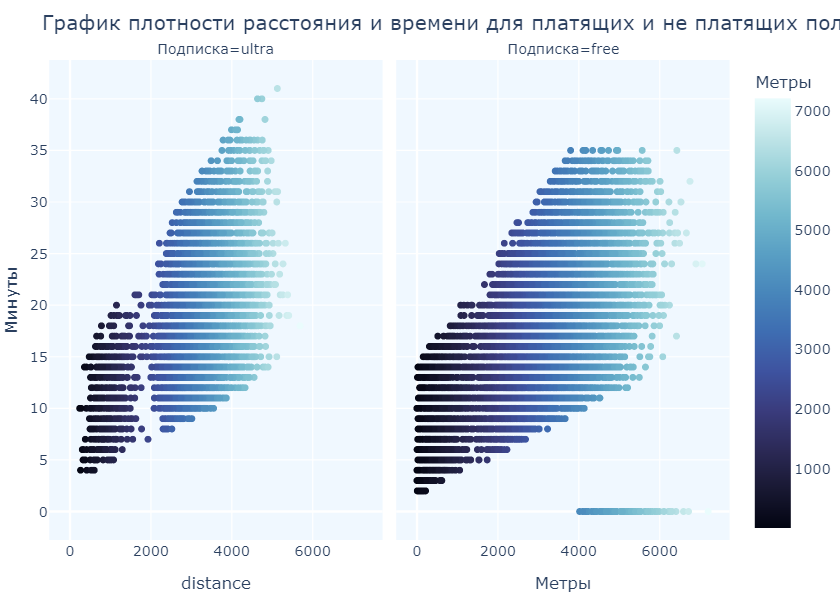

In [49]:
fig = px.scatter(data, 
                 x='distance', 
                 y='duration', 
                 facet_col='subscription_type', 
                 color='distance',
                 color_continuous_scale='ice',
                 title='График плотности расстояния и времени для платящих и не платящих пользователей',
                 labels={'distance': 'Метры', 'duration': 'Минуты', 'subscription_type': 'Подписка'})

fig.update_layout(xaxis_title='distance', yaxis_title='Минуты',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})

fig.show()

Стоит отметить, что пользователи без подписки более равномерно распределены по времени и расстоянию поездок. 

Пользователи без подписки делают чуть более длинные поездки, в то время как пользователи с подпиской делают чуть более долгие поездки. 

У пользователей с подпиской мало очень коротких по расстоянию, но довольно длительных по времени поездок. 

У пользователей без подписки таких поездок значительно больше. Можно сделать предположение, что в эту группу, которая совершает короткие но продолжительные поездки входят новые пользователи, которые только знакомятся с сервисом и учатся взаимодействовать с ним, с самокатом и окружением. 

Пользователи с подпиской: 

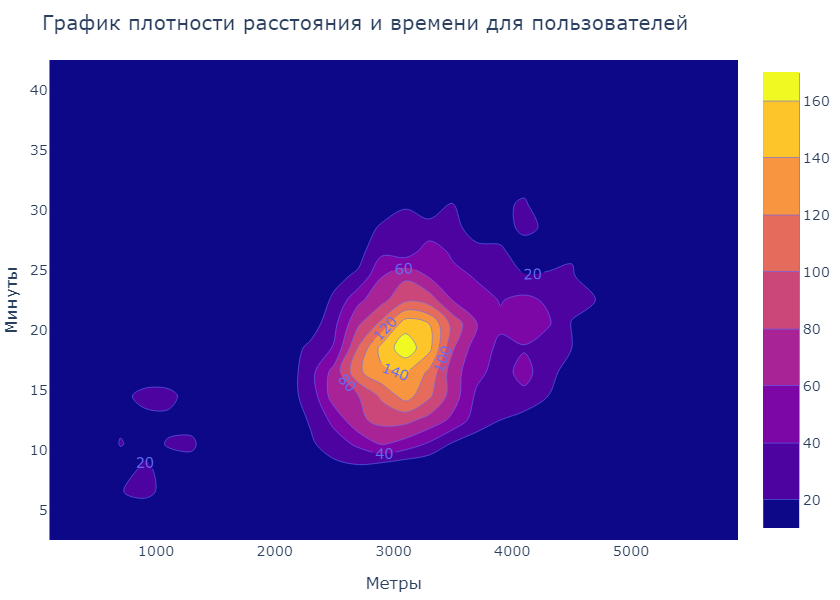

In [50]:
density_c(subscription_on)

Пользователи без подписки:

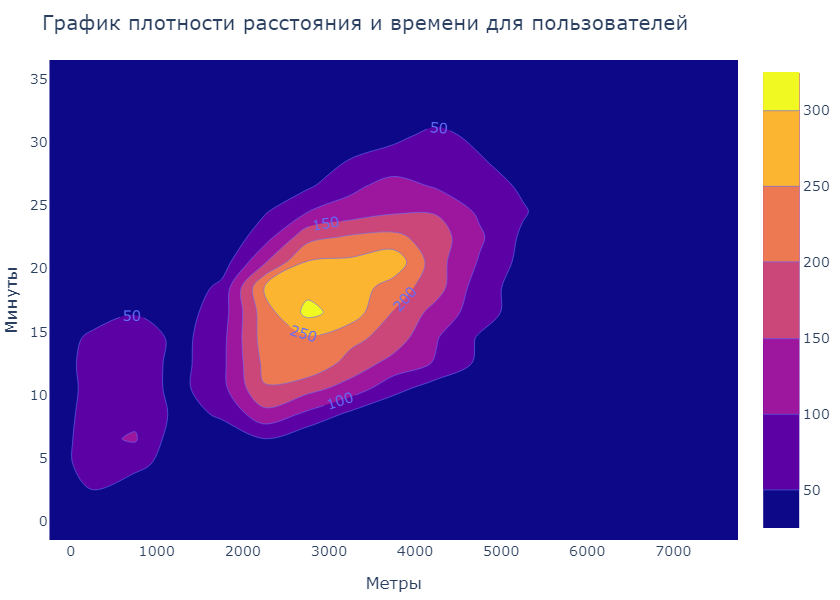

In [51]:
density_c(subscription_off)

Если посмотреть на график плотности не платящих пользователей, предположение о том, что пользователей с короткими и продолжительными поездками значительно много — верно. У пользователей с подпиской в этом сегменте таких пользователей мало. 

Для пользователей с подпиской преобладающими являются поездки примерно на ``3099 метров`` и продолжительностью примерно ``18.5 минут``. Такие пользователи катаются со скоростью ``10.28 км/ч``. 

Для пользователей без подписки преобладающее значение расстояния и продолжительности — ``2749.5 метров`` и ``16.5 минут``. Такие пользователи ездят со скоростью ``10.26 км/ч``. 

Все пользователи: 

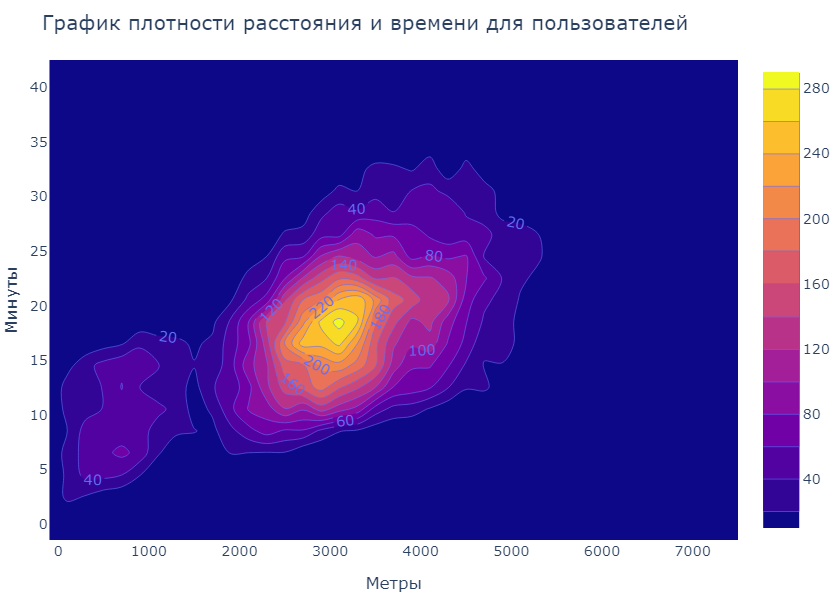

In [52]:
density_c(data)

На графике без разделения по признаку подписки совмещены все особенности, преобладающее расстояние ``3099.5 метров`` и ``18.5 минут``, большое расстояние поездок и высокая продолжительность. А также видно значительное количество пользователей с длительными по времени, но относительно короткими поездками. 

<a id="num74"></a>
### Вывод

Важно отметить, что существует заметное различие в поведении пользователей с подпиской и без нее. Пользователи __без подписки имеют более равномерное распределение как по времени, так и по расстоянию поездок__. Они совершают __чуть более длинные поездки__.

С другой стороны, пользователи __с подпиской предпочитают чуть более долгие по времени поездки__, но их поездки имеют меньшее расстояние. В этой группе пользователей также отмечается меньшее количество коротких по расстоянию, но продолжительных по времени поездок.

Вероятно, пользователи без подписки, которые совершают короткие, но продолжительные поездки, включают в себя новых пользователей, только знакомящихся с сервисом и учащихся взаимодействовать с ним и самокатами. 

<a id="num8"></a>
## Подсчёт выручки

<a id="num81"></a>
### Агрегированные данные о поездках

Отберем данные, которые потребуются для дальнейшей работы и добавим суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [53]:
agg_ride = (data.pivot_table(index=['user_id','month'],
                            values=['city', 'subscription_type', 'distance', 'duration', 'date',
                                     'minute_price', 'start_ride_price', 'subscription_fee'],
                            aggfunc={'city': 'first', 
                                     'subscription_type': 'first',
                                     'distance': 'sum',
                                     'duration': 'sum',
                                     'date': 'count',
                                     'minute_price': 'first',
                                     'start_ride_price': 'first',
                                     'start_ride_price': 'first',
                                     'subscription_fee': 'first'
                                    }, fill_value=0)
            .rename(columns={'date': 'ride_count', 
                            'distance': 'distance_sum',
                            'duration': 'duration_sum',}))

In [54]:
agg_ride

city  ride_count  distance_sum  duration_sum  \
user_id month                                                           
1       2021-01-01     Тюмень           2          7028            42   
        2021-04-01     Тюмень           1           754             6   
        2021-08-01     Тюмень           2          6724            45   
        2021-10-01     Тюмень           2          5810            32   
        2021-11-01     Тюмень           3          7004            53   
...                       ...         ...           ...           ...   
1534    2021-06-01  Краснодар           2          3409            24   
        2021-08-01  Краснодар           2          7623            47   
        2021-09-01  Краснодар           1          4928            23   
        2021-11-01  Краснодар           4         13349            76   
        2021-12-01  Краснодар           1          2372            16   

                    minute_price  start_ride_price  subscription_fee  \
user_id month                                                          
1       2021-01-01             6                 0               199   
        2021-04-01             6                 0               199   
        2021-08-01             6                 0               199   
        2021-10-01             6                 0               199   
        2021-11-01             6                 0               199   
...                          ...               ...               ...   
1534    2021-06-01             8                50                 0   
        2021-08-01             8                50                 0   
        2021-09-01             8                50                 0   
        2021-11-01             8                50                 0   
        2021-12-01             8                50                 0   

                   subscription_type  
user_id month                         
1       2021-01-01             ultra  
        2021-04-01             ultra  
        2021-08-01             ultra  
        2021-10-01             ultra  
        2021-11-01             ultra  
...                              ...  
1534    2021-06-01              free  
        2021-08-01              free  
        2021-09-01              free  
        2021-11-01              free  
        2021-12-01              free  

[11331 rows x 8 columns]

In [55]:
empty_s(agg_ride)

,0
city,0.00
ride_count,0.00
distance_sum,0.00
duration_sum,0.00
minute_price,0.00
start_ride_price,0.00
subscription_fee,0.00
subscription_type,0.00


Получена сводная таблица с данными о пользователях. Пропусков в данных нет. 

<a id="num82"></a>
### Помесячная выручка для каждого пользователя

In [56]:
data['distance'] = data['distance'].round(0).astype(int)

In [57]:
agg_ride['month_income'] = (
                              (agg_ride['minute_price'] * agg_ride['duration_sum']) 
                            + (agg_ride['ride_count'] * agg_ride['start_ride_price']) 
                            +  agg_ride['subscription_fee'])

In [58]:
agg_ride.tail()

city  ride_count  distance_sum  duration_sum  \
user_id month                                                           
1534    2021-06-01  Краснодар           2          3409            24   
        2021-08-01  Краснодар           2          7623            47   
        2021-09-01  Краснодар           1          4928            23   
        2021-11-01  Краснодар           4         13349            76   
        2021-12-01  Краснодар           1          2372            16   

                    minute_price  start_ride_price  subscription_fee  \
user_id month                                                          
1534    2021-06-01             8                50                 0   
        2021-08-01             8                50                 0   
        2021-09-01             8                50                 0   
        2021-11-01             8                50                 0   
        2021-12-01             8                50                 0   

                   subscription_type  month_income  
user_id month                                       
1534    2021-06-01              free           292  
        2021-08-01              free           476  
        2021-09-01              free           234  
        2021-11-01              free           808  
        2021-12-01              free           178

In [59]:
agg_ride

city  ride_count  distance_sum  duration_sum  \
user_id month                                                           
1       2021-01-01     Тюмень           2          7028            42   
        2021-04-01     Тюмень           1           754             6   
        2021-08-01     Тюмень           2          6724            45   
        2021-10-01     Тюмень           2          5810            32   
        2021-11-01     Тюмень           3          7004            53   
...                       ...         ...           ...           ...   
1534    2021-06-01  Краснодар           2          3409            24   
        2021-08-01  Краснодар           2          7623            47   
        2021-09-01  Краснодар           1          4928            23   
        2021-11-01  Краснодар           4         13349            76   
        2021-12-01  Краснодар           1          2372            16   

                    minute_price  start_ride_price  subscription_fee  \
user_id month                                                          
1       2021-01-01             6                 0               199   
        2021-04-01             6                 0               199   
        2021-08-01             6                 0               199   
        2021-10-01             6                 0               199   
        2021-11-01             6                 0               199   
...                          ...               ...               ...   
1534    2021-06-01             8                50                 0   
        2021-08-01             8                50                 0   
        2021-09-01             8                50                 0   
        2021-11-01             8                50                 0   
        2021-12-01             8                50                 0   

                   subscription_type  month_income  
user_id month                                       
1       2021-01-01             ultra           451  
        2021-04-01             ultra           235  
        2021-08-01             ultra           469  
        2021-10-01             ultra           391  
        2021-11-01             ultra           517  
...                              ...           ...  
1534    2021-06-01              free           292  
        2021-08-01              free           476  
        2021-09-01              free           234  
        2021-11-01              free           808  
        2021-12-01              free           178  

[11331 rows x 9 columns]

Получилась ``11331`` строка и ``8`` столбцов: 
- идентификатор пользователя ``user_id``;
- месяц ``month``;
- город ``city``;
- количество поездок в этом месяце ``ride_count``;
- суммарное расстояние за месяц ``distance_sum``;
- суммарная продолжительность за месяц ``duration_sum``; 
- цена поездки в минуту ``minute_price``;
- цена начала поездки ``start_ride_price``;
- стоимость подписки ``subscription_fee``;
- тип подписки ``subscription_type``;
- помесячная выручка на каждого пользователя ``month_income``.

In [60]:
agg_ride['month_income'].sum()

3812767

In [61]:
print(round(agg_ride.groupby('subscription_type')['month_income'].mean()))

subscription_type
free     322.0
ultra    359.0
Name: month_income, dtype: float64


In [62]:
agg_ride.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, Timestamp('2021-01-01 00:00:00')) to (1534, Timestamp('2021-12-01 00:00:00'))
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               11331 non-null  object
 1   ride_count         11331 non-null  int64 
 2   distance_sum       11331 non-null  int64 
 3   duration_sum       11331 non-null  int32 
 4   minute_price       11331 non-null  int64 
 5   start_ride_price   11331 non-null  int64 
 6   subscription_fee   11331 non-null  int64 
 7   subscription_type  11331 non-null  object
 8   month_income       11331 non-null  int64 
dtypes: int32(1), int64(6), object(2)
memory usage: 797.8+ KB


<a id="num9"></a>
## Проверка гипотез

Приступим к проверке поставленных гипотез. 
Всего гипотез основанных на представленных данных — три и одна гипотеза теоретическая. 

1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
4. Подбор теста проверки гипотезы для представленной задачи. 

<a id="num91"></a>
### Гипотеза: тратят ли пользователи с подпиской больше времени на поездки?

Есть предположение, что пользователи с подпиской дольше ездят на самокатах. Необходимо проверить эту гипотезу и сделать вывод, действительно ли пользователи с подпиской приносят больше прибыли. 

Для проверки этого предположения воспользуемся гипотезой о равенстве средних для зависимых выборок. Этот метод подойдет для этой генеральной совокупности данных, в которых есть только один отличающийся признак. 

Нулевая гипотеза: 
- Пользователи с подпиской ездят на самокатах одинаково или меньше пользователей без подписки. 

Альтернативная гипотеза: 
- Пользователи с подпиской ездят на самокатах дольше. 

In [63]:
alpha = 0.05 
results = st.ttest_ind(subscription_on['duration'], subscription_off['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.1600689435611813e-35
Отвергаем нулевую гипотезу


Значение p-vlaue: ``3.1600689435611813e-35`` очень близко к нулю. С очень высокой степенью уверенности можно сказать, что средние значения двух выборок ``subscription_off['duration']`` и ``subscription_on['duration']`` различаются статистически значимо. 

Различие между этими двумя группами не случайное и нулевая гипотеза может быть отклонена.

Подобные результаты можно получить и в графическом виде. 

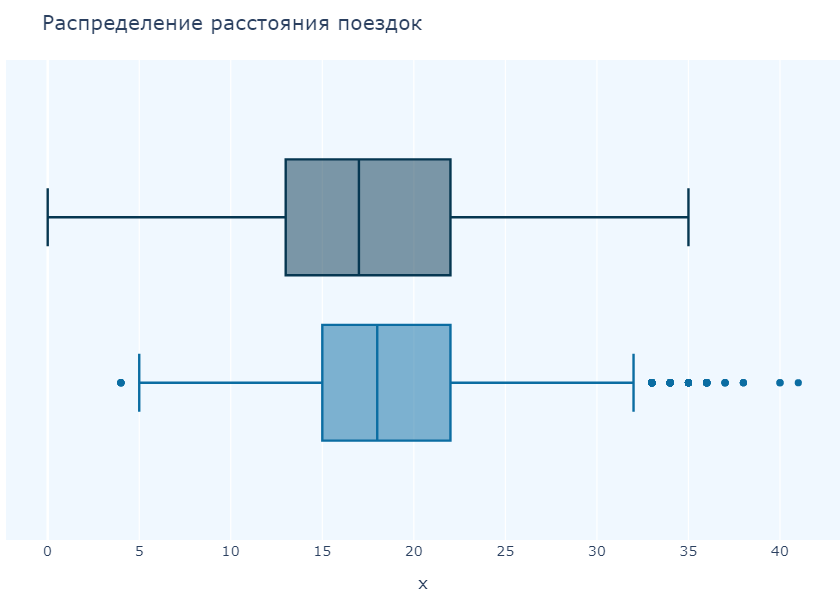

In [64]:
fig = px.box(subscription_on, 
             x=subscription_on['duration'].round(2), 
             color_discrete_sequence=[colors[2]],
             title='Распределение расстояния поездок')

fig.update_layout(plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50}, )

fig.add_trace(
    px.box(subscription_off, 
           x=subscription_off['duration'].round(2), 
           color_discrete_sequence=[colors[0]]).data[0])

fig.show()

На верхнем графике отображено значение для пользователей без подписки. Между данными видно различие. Не смотря на то, что охват пользователей в категории без подписки больше, пользователи с подпиской более качественно пользуются услугами и медианное значение прибыли с их поездок несколько выше. 

Пользователи с подпиской несколько дольше ездят на самокатах. Медианное значение продолжительности поездки у них выше. Если пользователи тратят больше времени на поездки, значит и выгоды с них больше.

Подобная информация позволяет разрабатывать новые тарифы, предложения и прочие подобные активности, чтобы стимулировать пользователей использовать сервис активнее и сделать подписку более привлекательной для пользователей без подписки. 

<a id="num92"></a>
### Гипотеза 2: среднее расстояние поездки пользователей с подпиской не превышает 3130 метров

Есть предположение, что пользователи с подпиской преодолевают расстояние за одну подписку менее 3130 метров. Необходимо это проверить. Данные об этом дадут представление о том, на сколько изнашивается самокат. Также известно, что расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 

Для проверки этого предположения воспользуемся проверкой односторонних гипотез. 

Нулевая гипотеза:
- Среднее расстояние, преодоленное пользователями с подпиской за одну поездку, равно 3130 метров.

Альтернативная гипотеза:
- Среднее расстояние, преодоленное пользователями с подпиской за одну поездку, больше 3130 метров.

In [65]:
prev_screens_value = 3130

alpha = 0.05 

results = st.ttest_1samp(
    subscription_on['distance'], 
    prev_screens_value,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195649894697724
Не отвергаем нулевую гипотезу


Также, самые простые методы подсчета могут дать подобный доказанному результат. 

In [66]:
subscription_on['distance'].mean().round(1)

3115.4

Нулевая гипотеза, утверждает, что среднее расстояние поездки для группы с подпиской менее оптимального. Поскольку p-значение больше уровня статистической значимости, нет причин для того, чтобы отвергнуть эту нулевую гипотезу. 

То, что пользователи с подпиской проезжают меньше оптимального, дает возможность планировать замену и обновление парка, учитывая приблизительные результаты износа. 

<a id="num93"></a>
### Гипотеза 3: помесячная выручка от пользователей с подпиской по месяцам выше. 

Есть предположение о том, что выручка от пользоваетелей с подпиской выше, чем выручка от пользователей без подписки. Сравним эти данные. 

Для проверки этого предположения воспользуемся гипотезой о равенстве средних для зависимых выборок. Этот метод подойдет для этой генеральной совокупности данных, в которых есть только один отличающийся признак.

Нулевая гипотеза:
- Выручка от пользователей с подпиской не превышает или равна выручке от пользователей без подписки

Альтернативная гипотеза:
- Выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. 


In [67]:
alpha = 0.05 

results = st.ttest_ind(agg_ride[agg_ride['subscription_type'] == 'ultra']['month_income'], 
                       agg_ride[agg_ride['subscription_type'] == 'free']['month_income'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.7274069878387966e-37
Отвергаем нулевую гипотезу


In [68]:
sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.19124505225722097
Не получилось отвергнуть нулевую гипотезу


Результаты теста показывают, что p-значение составляет ``1``, что является крайне оольшим значением. Поскольку p-значение намного меньше выбранного уровня значимости — не отвергаем нулевую гипотезу.

Так как нулевая гипотеза не отклонена, то и не была принята во внимание альтернативная, что помесячная выручка от пользователей без подписки выше, чем выручка от пользователей с  подпиской, и эта разница статистически значима.

Также подобный результат, хоть и менее точный, можно получить графическим методом. 

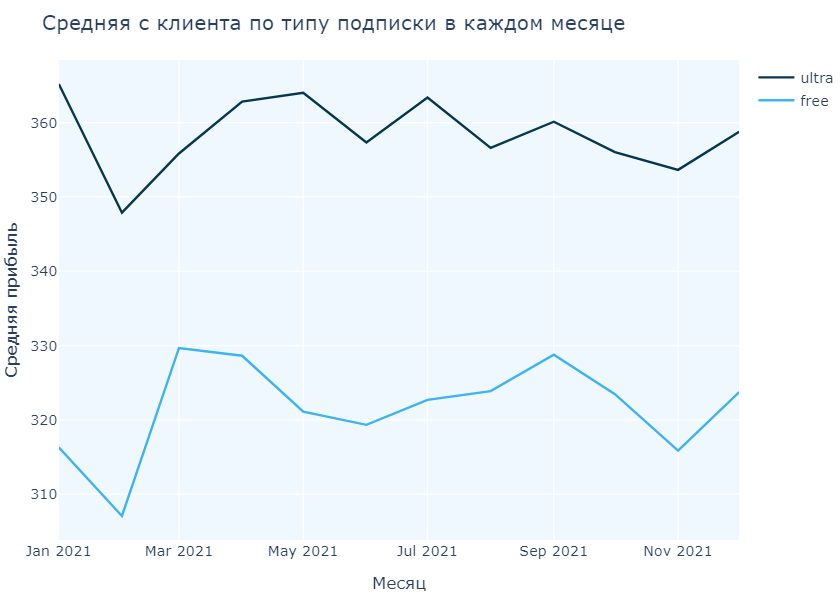

In [69]:
mean_month_income_ultra = (agg_ride[agg_ride['subscription_type'] == 'ultra']
                           .groupby('month')['month_income'].mean())
mean_month_income_free = (agg_ride[agg_ride['subscription_type'] == 'free']
                          .groupby('month')['month_income'].mean())

trace_ultra = go.Scatter(
                        x=mean_month_income_ultra.index, 
                        y=mean_month_income_ultra, 
                        mode='lines', name='ultra', 
                        line=dict(color=colors[0]))
trace_free = go.Scatter(
                        x=mean_month_income_free.index, 
                        y=mean_month_income_free, 
                        mode='lines', 
                        name='free', 
                        line=dict(color=colors[5]))
fig = go.Figure(data=[trace_ultra, trace_free])

fig.update_layout(title='Средняя с клиента по типу подписки в каждом месяце',
                   xaxis=dict(title='Месяц'),
                   yaxis=dict(title='Средняя прибыль'),
                   plot_bgcolor='AliceBlue',
                   margin={"r": 0, "t": 50, "l": 0, "b": 50})
fig.show()

На графике видно значительное различие между группами пользователей. Однако, не смотря на то, что данные сильно отличаются, общие тенденции у них похожи. 

При проведении исследования о жизнеспособности гипотезы о том, что помесячная выручка с пользователей с подпиской выше, можно учитывать эти данные, так как помесячная выручка от пользователей с подпиской действительно выше, чем выручка от пользователей без подписки, и эта разница статистически значима.

Что это может означать. Обладающие ежемесячной подпиской, более активно используют сервис, что увеличивает выручку компании. Это можно подтвердить также тем, что не смотря на то, что количество платящих за подписку пользователей меньше, выручки они делают больше. 

<a id="num94"></a>
### Гипотеза 4 (теоретическая). 

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Чтобы проверить гипотезу, стоит применить метод о равенстве среднего генеральной совокупности для зависимых выборок. В Python она реализована через ``scipy.stats.ttest_rel()``.

При проверке гипотезы о том, что обновление серверов снизило количество обращений в техподдержку, используется левосторонний тест. Это связано с тем, что интерес представляет собой снижение количества обращений, и мы хотим определить, есть ли статистически значимое снижение.

Таким образом, левосторонний тест проверяет, является ли среднее количество обращений меньше после обновления серверов по сравнению с до обновления.

<a id="num95"></a>
### Вывод

По результатам проверки всех трех гипотез о пользователях ``GoFast ``на основе представленных данных можно сделать следующие выводы:

1. Пользователи с подпиской действительно проводят больше времени в поездках, чем пользователи без подписки. Это означает, что пользователи с подпиской более активно используют сервис и проводят на самокатах больше времени. Эта информация может быть полезна для маркетинговой команды, чтобы продвигать подписки и стимулировать пользователей к долгосрочному использованию сервиса.

2. Нельзя утверждать, что пользователи с подпиской в среднем проезжают более оптимального за одну поездку. Однако значение близко к оптимальному с точки зрения износа самоката. Разнообразие длинных и коротких поездок может быть вызвано различными целями пользователей, обусловленными погодой, точкой начала и конца поездки. 

3. Помесячная выручка от пользователей с подпиской действительно выше, чем выручка от пользователей без подписки. Это свидетельствует о том, что модель подписки приносит дополнительный доход компании в том числе с учетом месячной платы. Можно рассматривать возможность разработки дополнительных привилегий для подписчиков или привлечения большего количества пользователей к подписке.

Таким образом, результаты анализа данных позволяют сделать вывод о том, что пользователи с подпиской действительно более выгодны для компании в плане времени, проведенного на поездках, и месячной выручки.

Что касается гипотезы №4. Для проверки гипотезы о снижении количества обращений в техподдержку после обновления серверов, необходимо использовать тест на равенство среднего количества обращений до и после обновления для каждого пользователя. Например, тест на равенство средних для зависимых выборок может быть применен. Однако, для этой задачи необходимо иметь данные о количестве обращений для каждого пользователя до и после обновления серверов.

<a id="num10"></a>
## Распределения

Отделу маркетинга ``GoFast`` поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум ``100`` существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают ``10 %`` пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно ``5 %``. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Предположим, что минимум ``100`` пользователей, которые купили подписку это ``10%`` от суммы всех приглашенных. Вероятность не выполнить план это ``5%``, а значит план должен быть выполнен на ``95%``. 

Так как в данном эксперименте есть только два исхода, продление или не продление подписки, стоит обратиться к биноминальному распределению.

Поделим задачу на две части: 
- Число продлений должо быть равно минимум 100;
- Вероятность такого события должна быть равна 95%. 

Если предположить, что при 1000 промокодах - 100 пользователей продлят подписку, то можно использовать это значение как отправную точку. 

Найдем вероятность не выполнения плана на 5%. 

Предположим, что мы разослали минимум 100 промокодов, от этого значения начнем подбор подходящих значений

In [70]:
from scipy.stats import binom
min_p = 0

while (1 - binom.cdf(k=100, n=min_p , p=0.1)) <= 0.95:
    print(min_p, (1 - binom.cdf(k=100, n=min_p , p=0.1)).round(5))
    min_p += 15

0 0.0
15 0.0
30 0.0
45 0.0
60 0.0
75 0.0
90 0.0
105 0.0
120 0.0
135 0.0
150 0.0
165 0.0
180 0.0
195 0.0
210 0.0
225 0.0
240 0.0
255 0.0
270 0.0
285 0.0
300 0.0
315 0.0
330 0.0
345 0.0
360 0.0
375 0.0
390 0.0
405 0.0
420 0.0
435 0.0
450 0.0
465 0.0
480 0.0
495 0.0
510 0.0
525 0.0
540 0.0
555 0.0
570 0.0
585 0.0
600 0.0
615 0.0
630 0.0
645 0.0
660 1e-05
675 3e-05
690 8e-05
705 0.00017
720 0.00037
735 0.00074
750 0.00143
765 0.00265
780 0.00469
795 0.00797
810 0.01305
825 0.02058
840 0.03134
855 0.04616
870 0.06586
885 0.09117
900 0.12263
915 0.16052
930 0.20478
945 0.25497
960 0.31028
975 0.36958
990 0.43146
1005 0.4944
1020 0.55682
1035 0.61725
1050 0.67438
1065 0.72718
1080 0.77489
1095 0.8171
1110 0.85366
1125 0.88469
1140 0.91051
1155 0.93159
1170 0.94849


При рассылке примерно 1170 кодов, шанс на выполнение задачи будет равен примерно 95%.

При рассылке примерно 1170 кодов, шанс на выполнение задачи будет равен примерно 95%.

1. **Обзор данных:**

    - В предоставленных данных были три таблицы: ``users`` с информацией о пользователях, ``rides`` с данными о поездках и ``subscription`` с данными об условиях подписки.
    - В таблице ``users`` содержалась информация о ``1565`` пользователях, включая их идентификаторы, имена, возраст, города и типы подписок. Были обнаружены и удалены дубликаты.
    - В таблице ``rides`` представлена информация о ``18068`` поездках, включая идентификаторы пользователей, дистанцию, продолжительность и дату каждой поездки. Тип данных для столбца ``date`` был исправлен на дату.
    - В таблице ``subscription`` содержалась информация о доступных подписках, включая типы подписок, цены и другие параметры. Данные были готовы для дальнейшей работы.

2. **Анализ данных:**
    - В данных представлены ``8`` городов, где работал сервис ``GoFast``, с различным количеством пользователей.
    - Существует два типа подписок: ``free`` и ``ultra``. Большинство пользователей не используют подписку.
    - Возраст пользователей разнообразен, средний возраст составляет ``25 лет``.
    - Пользователи без подписки проявляют более равномерное распределение как по времени, так и по расстоянию своих поездок, их поездки в среднем немного длиннее.
    - Пользователи с подпиской предпочитают совершать более продолжительные по времени поездки, но с меньшими расстояниями. 

3. **Проверка гипотез:**
- Были проверены три гипотезы о сервисе ``GoFast``:
    - Пользователи с подпиской проводят больше времени в поездках, и это различие статистически значимо.
    - Пользователи с подпиской в среднем проезжают менее оптимального с точки износа самоката значния за одну поездку, но так как значение близко к этому порогу, они могут меняться при увеличении выборки.
    - Помесячная выручка от пользователей с подпиской действительно выше, чем выручка от пользователей без подписки, и это различие также статистически значимо.

- Гипотеза о снижении обращений в техподдержку:
Для проверки гипотезы о снижении количества обращений в техподдержку после обновления серверов необходимо использовать тест на равенство среднего количества обращений до и после обновления для каждого пользователя. Подходящим методом для этой задачи может быть тест на равенство средних для зависимых выборок.


**Краткий итог о сервисе GoFast:** 
- Пользователи с подпиской проводят больше времени на поездках, что может считаться выгодным для компании.

- Нельзя утверждать, что пользователи с подпиской в среднем проезжают более ``3130 метров`` за одну поездку. Но значение близко к оптимальному с точки зрения износа самоката.

- Месячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, и это различие статистически значимо.

**Рекомендации.**

На основе результатов анализа данных и выделенных заключений, можно предложить следующие рекомендации бизнесу GoFast:

1. **Продвижение подписок:** Учитывая, что пользователи с подпиской более активно используют сервис, стоит активно продвигать подписки среди пользователей. Это может включать в себя разработку маркетинговых кампаний, предоставление дополнительных привилегий для подписчиков и сезонные акции на подписки.

2. **Оптимизация парка самокатов:** Анализ данных о местах старта и окончания поездок может помочь оптимизировать размещение самокатов в городах. Это может улучшить доступность сервиса для пользователей и расширить охват мест, которые могут быть интересны для поездок.

3. **Стимулирование интенсивного использования сервиса:** Пользователи, которые проводят больше времени в поездках, могут быть ценными клиентами. Можно разработать программы лояльности, предоставляющие скидки или бонусы тем пользователям, которые активно используют сервис.

4. **Улучшение аналитики и прогнозирования:** Непрерывный мониторинг и анализ данных о пользователях и поездках могут помочь GoFast более точно прогнозировать спрос и разрабатывать более точные стратегии развития.

5. **Развитие гибких тарифов:** Понимание того, что разные группы пользователей могут иметь разные предпочтения и цели при использовании сервиса, может позволить GoFast создавать гибкие тарифы и предложения. Это может включать в себя краткосрочные подписки, пакетные предложения и другие варианты, удовлетворяющие потребности разных клиентов.
